In [12]:
import time
import threading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def multiply_matrices(matrix, constant_matrix, result, start, end):
    for i in range(start, end):
        result[i] = np.dot(matrix[i], constant_matrix)

def generate_random_matrices(size):
    return [np.random.rand(size, size) for _ in range(100)]

In [16]:
def main():
    matrix_size = 1000
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    random_matrices = generate_random_matrices(matrix_size)
    num_threads_list = [ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
    time_taken = []

    for num_threads in num_threads_list:
        start_time = time.time()

        threads = []
        results = [None] * len(random_matrices)

        for i in range(num_threads):
            start_index = i * (len(random_matrices) // num_threads)
            end_index = (i + 1) * (len(random_matrices) // num_threads) if i != num_threads - 1 else len(random_matrices)
            thread = threading.Thread(target=multiply_matrices,
                                      args=(random_matrices, constant_matrix, results, start_index, end_index))
            threads.append(thread)
            thread.start()

        for thread in threads:
            thread.join()

        end_time = time.time()
        time_taken.append(end_time - start_time)

    data = {"Number of Threads": num_threads_list, "Time Taken (s)": time_taken}
    df = pd.DataFrame(data)
    print(df)

    plt.plot(num_threads_list, time_taken, marker='o')
    plt.title("Time vs Number of Threads")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time Taken (s)")
    plt.xticks(np.arange(0, 25, step=2))
    plt.grid(True)
    plt.show()

    Number of Threads  Time Taken (s)
0                   2        1.590138
1                   4        1.312521
2                   6        1.368981
3                   8        1.284195
4                  10        1.262705
5                  12        1.320168
6                  14        1.346023
7                  16        1.430843
8                  18        1.406551
9                  20        1.338357
10                 22        1.411645
11                 24        1.334820


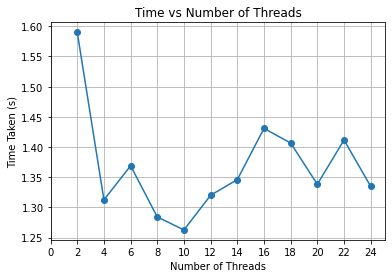

In [15]:
if __name__ == "__main__":
    main()